In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr

In [2]:
os.chdir("/Polycarbon/hand Motion Clasification")

In [3]:
ds=[]
for i in range(1,13):
    filename = "M"+str(i)+"-Benjarat"    
    df= pd.read_csv("data/Benjarat/"+filename+"/test-L-3.csv",names=['Batt','Time','C',
                                       'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8','L',
                                       'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','U',
                                       'Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','AD',
                                       'q1','q2','q3','q4','AI',
                                       'ax','ay','az','AM',
                                       'gx','gy','gz','AQ',
                                       'mx','my','mz',"AU"])
    d = df.loc[:,[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']]
    d= pr.normalize_EEG(d)
    ds.append(df)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


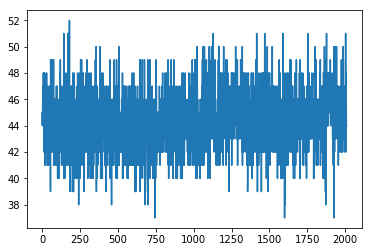

In [20]:
plt.plot(ds[3]["my"])
plt.show()

<IPython.core.display.Javascript object>


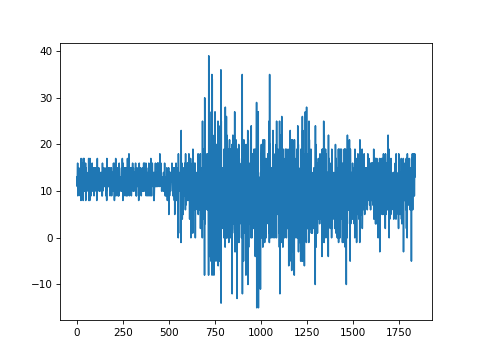

In [10]:

from IPython.display import display
%matplotlib nbagg

plt.plot(df["Raw-Ch1"])

<IPython.core.display.Javascript object>


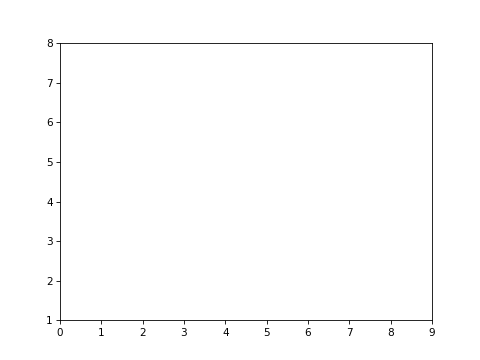

ValueError: cannot copy sequence with size 7 to array axis with dimension 8

In [11]:
for d in ds[1:10]:
    ax,d1 = pr.plot_EMG(d.Time,d.loc[:,["gx","gy","gz",'ax','ay','az','Smooth-Ch7']],filename,normalize=True)
    T =  pr.find_active_time(d.Time,d.loc[:,['gx','gy','gz']],ds[0].loc[:,['gx','gy','gz']])
    plt.axvline(x=T[0],color='r') 
    plt.axvline(x=T[1],color='r')
    plt.show()

In [92]:
def read_in_folder(folder_path,gesture_num):
    x=[]
    y=[]
    for file in os.listdir(folder_path):
        if( "-L-" in file ):  
            if(gesture_num!=1):
                d = pr.read_emg(folder_path+"/"+file)
                d= d.dropna().astype(float)
                d=d[["Time","gx","gy","gz",'ax','ay','az','Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7']]
                if(d.Time.size>300):
                    T =  pr.find_active_time(d.Time,d.loc[:,['gx','gy','gz']],ds[0].loc[:,['gx','gy','gz']])
                    print(folder_path+"/"+file)
                    if (len(T)==2):
                        x.append(d[d.Time>=T[0]].T.values[1:])
                        y.append(gesture_num)
            else:
                print(folder_path+"/"+file)
                d = pr.read_emg(folder_path+"/"+file)
                d= d.dropna().astype(float)
                d=d[["Time","gx","gy","gz",'ax','ay','az','Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7']]
                x.append(d.T.values[1:])
                y.append(gesture_num)
    return x,y


In [93]:
x = []
y = []
for sample in os.listdir("Data/")[1:10]:
    if(os.path.isdir("Data/"+sample) and sample!=".ipynb_checkpoints"):
        for i in range(1,14):
            filename = "M"+str(i)+"-"+sample  
            if len(os.listdir("Data/"+sample+"/"+filename))==2:
                for fd in os.listdir("Data/"+sample+"/"+filename):
                    filepath="Data/"+sample+"/"+filename+"/"+fd+"/"
                    u,v = read_in_folder(filepath,i)
            else:
                filepath="Data/"+sample+"/"+filename
                u,v = read_in_folder(filepath,i)
            x.extend(u)
            y.extend(v)

Data/Amnoey/M1-Amnoey/test-L-0.csv
Data/Amnoey/M1-Amnoey/test-L-1.csv
Data/Amnoey/M1-Amnoey/test-L-2.csv
Data/Amnoey/M1-Amnoey/test-L-3.csv
Data/Amnoey/M1-Amnoey/test-L-4.csv
Data/Amnoey/M1-Amnoey/test-L-5.csv
Data/Amnoey/M1-Amnoey/test-L-6.csv
Data/Amnoey/M1-Amnoey/test-L-7.csv
Data/Amnoey/M1-Amnoey/test-L-8.csv
Data/Amnoey/M1-Amnoey/test-L-9.csv
Data/Amnoey/M2-Amnoey/test-L-0.csv
Data/Amnoey/M2-Amnoey/test-L-1.csv
Data/Amnoey/M2-Amnoey/test-L-2.csv
Data/Amnoey/M2-Amnoey/test-L-3.csv
Data/Amnoey/M2-Amnoey/test-L-4.csv
Data/Amnoey/M2-Amnoey/test-L-5.csv
Data/Amnoey/M2-Amnoey/test-L-6.csv
Data/Amnoey/M2-Amnoey/test-L-7.csv
Data/Amnoey/M2-Amnoey/test-L-8.csv
Data/Amnoey/M2-Amnoey/test-L-9.csv
Data/Amnoey/M3-Amnoey/test-L-0.csv
Data/Amnoey/M3-Amnoey/test-L-1.csv
Data/Amnoey/M3-Amnoey/test-L-2.csv
Data/Amnoey/M3-Amnoey/test-L-3.csv
Data/Amnoey/M3-Amnoey/test-L-4.csv
Data/Amnoey/M3-Amnoey/test-L-5.csv
Data/Amnoey/M3-Amnoey/test-L-6.csv
Data/Amnoey/M3-Amnoey/test-L-7.csv
Data/Amnoey/M3-Amnoe

Data/amnuay/M12-amnuay/test-L-3.csv
Data/amnuay/M12-amnuay/test-L-4.csv
Data/amnuay/M12-amnuay/test-L-5.csv
Data/amnuay/M12-amnuay/test-L-6.csv
Data/amnuay/M12-amnuay/test-L-7.csv
Data/amnuay/M12-amnuay/test-L-8.csv
Data/amnuay/M12-amnuay/test-L-9.csv
Data/amnuay/M13-amnuay/test-L-0.csv
Data/amnuay/M13-amnuay/test-L-1.csv
Data/amnuay/M13-amnuay/test-L-2.csv
Data/amnuay/M13-amnuay/test-L-3.csv
Data/amnuay/M13-amnuay/test-L-4.csv
Data/amnuay/M13-amnuay/test-L-5.csv
Data/amnuay/M13-amnuay/test-L-6.csv
Data/amnuay/M13-amnuay/test-L-7.csv
Data/amnuay/M13-amnuay/test-L-8.csv
Data/amnuay/M13-amnuay/test-L-9.csv
Data/ampai2/M1-ampai2/test-L-0.csv
Data/ampai2/M1-ampai2/test-L-1.csv
Data/ampai2/M1-ampai2/test-L-2.csv
Data/ampai2/M1-ampai2/test-L-3.csv
Data/ampai2/M1-ampai2/test-L-4.csv
Data/ampai2/M1-ampai2/test-L-5.csv
Data/ampai2/M1-ampai2/test-L-6.csv
Data/ampai2/M1-ampai2/test-L-7.csv
Data/ampai2/M1-ampai2/test-L-8.csv
Data/ampai2/M1-ampai2/test-L-9.csv
Data/ampai2/M2-ampai2/test-L-0.csv
Dat

Data/angkana/M9-angkana/test-L-1.csv
Data/angkana/M9-angkana/test-L-2.csv
Data/angkana/M9-angkana/test-L-3.csv
Data/angkana/M9-angkana/test-L-4.csv
Data/angkana/M9-angkana/test-L-5.csv
Data/angkana/M9-angkana/test-L-6.csv
Data/angkana/M9-angkana/test-L-7.csv
Data/angkana/M9-angkana/test-L-8.csv
Data/angkana/M9-angkana/test-L-9.csv
Data/angkana/M10-angkana/test-L-0.csv
Data/angkana/M10-angkana/test-L-1.csv
Data/angkana/M10-angkana/test-L-2.csv
Data/angkana/M10-angkana/test-L-3.csv
Data/angkana/M10-angkana/test-L-4.csv
Data/angkana/M10-angkana/test-L-5.csv
Data/angkana/M10-angkana/test-L-6.csv
Data/angkana/M10-angkana/test-L-7.csv
Data/angkana/M10-angkana/test-L-8.csv
Data/angkana/M10-angkana/test-L-9.csv
Data/angkana/M11-angkana/test-L-0.csv
Data/angkana/M11-angkana/test-L-1.csv
Data/angkana/M11-angkana/test-L-2.csv
Data/angkana/M11-angkana/test-L-3.csv
Data/angkana/M11-angkana/test-L-4.csv
Data/angkana/M11-angkana/test-L-5.csv
Data/angkana/M11-angkana/test-L-6.csv
Data/angkana/M11-angk

Data/Aueporn/M4-Aueporn/test-L-9.csv
Data/Aueporn/M5-Aueporn/test-L-0.csv
Data/Aueporn/M5-Aueporn/test-L-1.csv
Data/Aueporn/M5-Aueporn/test-L-2.csv
Data/Aueporn/M5-Aueporn/test-L-3.csv
Data/Aueporn/M5-Aueporn/test-L-4.csv
Data/Aueporn/M5-Aueporn/test-L-5.csv
Data/Aueporn/M5-Aueporn/test-L-6.csv
Data/Aueporn/M5-Aueporn/test-L-7.csv
Data/Aueporn/M5-Aueporn/test-L-8.csv
Data/Aueporn/M5-Aueporn/test-L-9.csv
Data/Aueporn/M6-Aueporn/test-L-0.csv
Data/Aueporn/M6-Aueporn/test-L-1.csv
Data/Aueporn/M6-Aueporn/test-L-2.csv
Data/Aueporn/M6-Aueporn/test-L-3.csv
Data/Aueporn/M6-Aueporn/test-L-4.csv
Data/Aueporn/M6-Aueporn/test-L-5.csv
Data/Aueporn/M6-Aueporn/test-L-6.csv
Data/Aueporn/M6-Aueporn/test-L-7.csv
Data/Aueporn/M6-Aueporn/test-L-8.csv
Data/Aueporn/M6-Aueporn/test-L-9.csv
Data/Aueporn/M7-Aueporn/test-L-0.csv
Data/Aueporn/M7-Aueporn/test-L-1.csv
Data/Aueporn/M7-Aueporn/test-L-2.csv
Data/Aueporn/M7-Aueporn/test-L-3.csv
Data/Aueporn/M7-Aueporn/test-L-4.csv
Data/Aueporn/M7-Aueporn/test-L-5.csv
D

Data/Benjarat/M1-Benjarat/test-L-6.csv
Data/Benjarat/M1-Benjarat/test-L-7.csv
Data/Benjarat/M1-Benjarat/test-L-8.csv
Data/Benjarat/M1-Benjarat/test-L-9.csv
Data/Benjarat/M2-Benjarat/test-L-0.csv
Data/Benjarat/M2-Benjarat/test-L-1.csv
Data/Benjarat/M2-Benjarat/test-L-2.csv
Data/Benjarat/M2-Benjarat/test-L-3.csv
Data/Benjarat/M2-Benjarat/test-L-4.csv
Data/Benjarat/M2-Benjarat/test-L-5.csv
Data/Benjarat/M2-Benjarat/test-L-6.csv
Data/Benjarat/M2-Benjarat/test-L-7.csv
Data/Benjarat/M2-Benjarat/test-L-8.csv
Data/Benjarat/M2-Benjarat/test-L-9.csv
Data/Benjarat/M3-Benjarat/test-L-0.csv
Data/Benjarat/M3-Benjarat/test-L-1.csv
Data/Benjarat/M3-Benjarat/test-L-2.csv
Data/Benjarat/M3-Benjarat/test-L-3.csv
Data/Benjarat/M3-Benjarat/test-L-4.csv
Data/Benjarat/M3-Benjarat/test-L-5.csv
Data/Benjarat/M3-Benjarat/test-L-6.csv
Data/Benjarat/M3-Benjarat/test-L-7.csv
Data/Benjarat/M3-Benjarat/test-L-8.csv
Data/Benjarat/M3-Benjarat/test-L-9.csv
Data/Benjarat/M4-Benjarat/test-L-0.csv
Data/Benjarat/M4-Benjarat

Data/Boonching/M6-Boonching/test-L-9(1).csv
Data/Boonching/M6-Boonching/test-L-9.csv
Data/Boonching/M7-Boonching/test-L-0.csv
Data/Boonching/M7-Boonching/test-L-1.csv
Data/Boonching/M7-Boonching/test-L-12.csv
Data/Boonching/M7-Boonching/test-L-13.csv
Data/Boonching/M7-Boonching/test-L-2.csv
Data/Boonching/M7-Boonching/test-L-3.csv
Data/Boonching/M7-Boonching/test-L-4.csv
Data/Boonching/M7-Boonching/test-L-5.csv
Data/Boonching/M7-Boonching/test-L-6.csv
Data/Boonching/M7-Boonching/test-L-7.csv
Data/Boonching/M8-Boonching/test-L-0.csv
Data/Boonching/M8-Boonching/test-L-1.csv
Data/Boonching/M8-Boonching/test-L-2.csv
Data/Boonching/M8-Boonching/test-L-3.csv
Data/Boonching/M8-Boonching/test-L-4.csv
Data/Boonching/M8-Boonching/test-L-5.csv
Data/Boonching/M8-Boonching/test-L-6.csv
Data/Boonching/M8-Boonching/test-L-7.csv
Data/Boonching/M8-Boonching/test-L-8.csv
Data/Boonching/M8-Boonching/test-L-9.csv
Data/Boonching/M9-Boonching/test-L-0.csv
Data/Boonching/M9-Boonching/test-L-1.csv
Data/Boonch

In [96]:

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation

def build_model():
    input_signal = Input(shape=(14,2000),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
#     x = LSTM(100, return_sequences=False)(x)
#     x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(13, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [13]:
 def build_model2():
    input_signal = Input(shape=(30,2000),name="input_signal")
    x = LSTM(100, return_sequences=False)(input_signal)
    x = Dropout(0.5)(x)

    dense_out = Dense(13, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [65]:
def build_model3():
    #Initializing the ANN
    model = Sequential()
    #Adding input layer and first hidden layer
    model.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = (30,200)))
    #Adding second hidden layer
    model.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
    #Adding the output layer
    model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    #Compiling the ANN
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


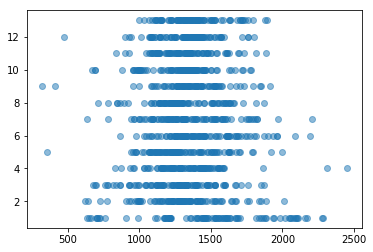

In [10]:
v = [len(x[i][0]) for i in range(len(x))]
plt.scatter(v, y, alpha=0.5)
plt.show()

In [121]:
from keras.preprocessing import sequence
X=np.array([sequence.pad_sequences(b, padding="post",maxlen=2000)for b in x])

In [111]:
x[0]

array([[ 0.02,  0.02,  0.02, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.02, ..., -0.02, -0.02, -0.02],
       [ 0.08,  0.08,  0.08, ...,  0.02,  0.02,  0.02],
       ...,
       [10.8 , 10.94, 10.91, ..., 11.63, 11.54, 11.4 ],
       [ 9.89, 10.2 , 10.09, ..., 10.94, 10.57, 10.4 ],
       [10.69, 10.89, 10.71, ..., 10.17, 10.34, 10.06]])

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.5,stratify=y)

model=build_model()  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 100, nb_epoch = 90)


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/90
592/592 [==============================] - 1s 2ms/step - loss: 2.5697 - acc: 0.0591
Epoch 2/90
592/592 [==============================] - 0s 226us/step - loss: 2.5364 - acc: 0.0929
Epoch 3/90
592/592 [==============================] - 0s 227us/step - loss: 2.4916 - acc: 0.0845
Epoch 4/90
592/592 [==============================] - 0s 219us/step - loss: 2.4254 - acc: 0.1098
Epoch 5/90
592/592 [==============================] - 0s 222us/step - loss: 2.2908 - acc: 0.1571
Epoch 6/90
592/592 [==============================] - 0s 224us/step - loss: 2.1580 - acc: 0.1993
Epoch 7/90
592/592 [==============================] - 0s 209us/step - loss: 2.0140 - acc: 0.2466
Epoch 8/90
592/592 [==============================] - 0s 226us/step - loss: 1.9282 - acc: 0.2720
Epoch 9/90
592/592 [==============================] - 0s 232us/step - loss: 1.8645 - acc: 0.3294
Epoch 10/90
592/592 [==============================] - 0s 211us/step - loss: 1.7793 - acc: 0.4003
Epoch 11/90
592/592 [==========

In [131]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

592/592 [==============================] - 1s 1ms/step

acc: 68.07%


In [132]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)

In [108]:
X

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [10, 10, 10, ...,  0,  0,  0],
        [ 9, 10, 10, ...,  0,  0,  0],
        [10, 10, 10, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [11, 11, 11, ...,  0,  0,  0],
        [12, 11, 11, ...,  0,  0,  0],
        [10, 10, 10, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [11, 11, 11, ...,  0,  0,  0],
        [10, 10, 10, ...,  0,  0,  0],
        [10, 10, 10, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [71, 71, 71, ...,  0,  0,  0],
        [45, 44, 44, ...,  0,  0,  0],
        [80, 77, 76, ...,  0,  0

Confusion matrix, without normalization
[[36  0  0  5  0  0  1  2  1  0  0  0  0]
 [ 0 34  0  1  2  0  1  2  0  1  0  0  4]
 [ 2  0 29  0  0  2  6  3  0  1  5  0  0]
 [ 2  0  1 41  0  0  0  1  0  0  1  1  0]
 [ 0  0  3  0 34  0  1  0  0  0  2  0  5]
 [ 2  5  8  7  0 25  1  0  0  0  1  0  0]
 [ 7  1  5  3  0  2 17  6  0  3  0  1  0]
 [ 0  1  1  3  1  0  0 35  0  0  1  0  4]
 [ 8  0  0  0  0  0  0  2 28  1  1  0  1]
 [ 1  0  2  0  0  1  2  7  0 30  0  2  0]
 [ 0  0  1  0  1  0  0  3  0  3 34  2  1]
 [ 2  0  3  1  0  1  0  3  0  3  1 31  0]
 [ 0  0  2  2  0  0  0  8  0  0  4  1 29]]


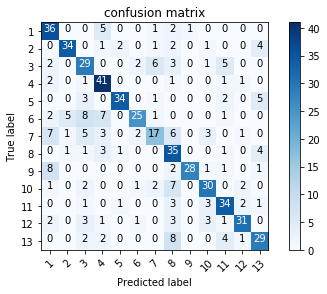

Normalized confusion matrix
[[0.8  0.   0.   0.11 0.   0.   0.02 0.04 0.02 0.   0.   0.   0.  ]
 [0.   0.76 0.   0.02 0.04 0.   0.02 0.04 0.   0.02 0.   0.   0.09]
 [0.04 0.   0.6  0.   0.   0.04 0.12 0.06 0.   0.02 0.1  0.   0.  ]
 [0.04 0.   0.02 0.87 0.   0.   0.   0.02 0.   0.   0.02 0.02 0.  ]
 [0.   0.   0.07 0.   0.76 0.   0.02 0.   0.   0.   0.04 0.   0.11]
 [0.04 0.1  0.16 0.14 0.   0.51 0.02 0.   0.   0.   0.02 0.   0.  ]
 [0.16 0.02 0.11 0.07 0.   0.04 0.38 0.13 0.   0.07 0.   0.02 0.  ]
 [0.   0.02 0.02 0.07 0.02 0.   0.   0.76 0.   0.   0.02 0.   0.09]
 [0.2  0.   0.   0.   0.   0.   0.   0.05 0.68 0.02 0.02 0.   0.02]
 [0.02 0.   0.04 0.   0.   0.02 0.04 0.16 0.   0.67 0.   0.04 0.  ]
 [0.   0.   0.02 0.   0.02 0.   0.   0.07 0.   0.07 0.76 0.04 0.02]
 [0.04 0.   0.07 0.02 0.   0.02 0.   0.07 0.   0.07 0.02 0.69 0.  ]
 [0.   0.   0.04 0.04 0.   0.   0.   0.17 0.   0.   0.09 0.02 0.63]]


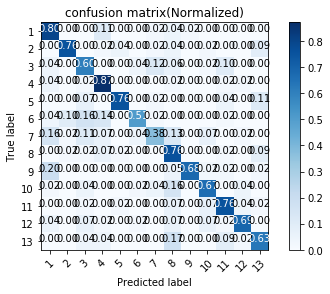

In [133]:
confuse_matrix_plot(y_test,prd+1,["1","2","3","4","5","6","7","8","9","10","11","12","13"],title="confusion matrix")

Confusion matrix, without normalization
[[77  0  4  0  0  0  1  8  0  5  1  0  1]
 [15 26  2  9  2  0  7  5  0  7  2 10  7]
 [13  0 23  3  4  0 20  6  0  5  4  8  5]
 [16  1  3 22  0  0 11  7  0  8 12 12  1]
 [ 9  0  0  5 36  0  9  2  1  5  9  5 10]
 [12  0  0  2  0 74  0  7  0  0  0  0  0]
 [11  0  5  1  0  0 41  2  0  7 11 12  1]
 [13  0  0  4  0  0  2 59  0  3  3  2  1]
 [ 0  0  0  0  0  0  0  0 82  0  0  0  0]
 [ 9  0  0  2  0  0  6  0  0 54  1 13  2]
 [ 8  0  1  3  5  0 20  1  0  2 31  1 14]
 [ 3  0  2  0  0  0 11  1  1  4  2 55  7]
 [ 7  0  0  1  4  0  5  4  0  1  6  1 58]]


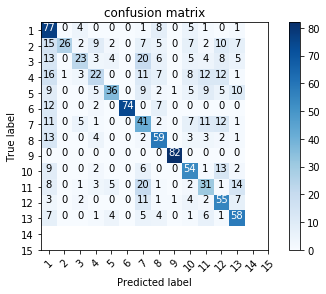

Normalized confusion matrix
[[0.79 0.   0.04 0.   0.   0.   0.01 0.08 0.   0.05 0.01 0.   0.01]
 [0.16 0.28 0.02 0.1  0.02 0.   0.08 0.05 0.   0.08 0.02 0.11 0.08]
 [0.14 0.   0.25 0.03 0.04 0.   0.22 0.07 0.   0.05 0.04 0.09 0.05]
 [0.17 0.01 0.03 0.24 0.   0.   0.12 0.08 0.   0.09 0.13 0.13 0.01]
 [0.1  0.   0.   0.05 0.4  0.   0.1  0.02 0.01 0.05 0.1  0.05 0.11]
 [0.13 0.   0.   0.02 0.   0.78 0.   0.07 0.   0.   0.   0.   0.  ]
 [0.12 0.   0.05 0.01 0.   0.   0.45 0.02 0.   0.08 0.12 0.13 0.01]
 [0.15 0.   0.   0.05 0.   0.   0.02 0.68 0.   0.03 0.03 0.02 0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.1  0.   0.   0.02 0.   0.   0.07 0.   0.   0.62 0.01 0.15 0.02]
 [0.09 0.   0.01 0.03 0.06 0.   0.23 0.01 0.   0.02 0.36 0.01 0.16]
 [0.03 0.   0.02 0.   0.   0.   0.13 0.01 0.01 0.05 0.02 0.64 0.08]
 [0.08 0.   0.   0.01 0.05 0.   0.06 0.05 0.   0.01 0.07 0.01 0.67]]


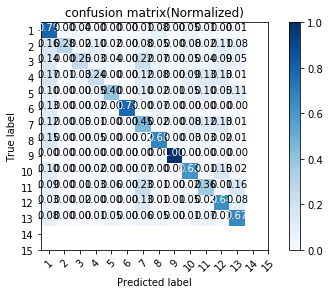

In [16]:
confuse_matrix_plot(y_train,prd+1,["1","2","3","4","5","6","7","8","9","10","11","12","13"],title="confusion matrix")

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def confuse_matrix_plot(Y,Pred,list_class,title="confusion matrix"):
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, Pred)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=list_class, normalize=False,
                          title=title)
    plt.show()
      # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=list_class, normalize=True,
                          title=title +'(Normalized)')
    plt.show()
